In [1]:
import os 
import pandas as pd
import numpy as np

from LoadData import LoadData
from FilterBasic import Filter
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

import functools
import operator

In [2]:
gap_animals = ["S7063", "S7064", "S7069"]
wt_animals = ["S7068", "S7070", "S7071"] 
gap_rec = [f for f in os.listdir() if "GAP.npy" in f]
wt_rec = [f for f in os.listdir() if "WT.npy" in f] 

In [3]:
# Here choose the animal recording and start/end
directory = '/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project/'
filename = 'S7063_GAP.npy'
start = 15324481
end = 36959040

# Load the recording and slice
data = LoadData(directory=directory, filename=filename, start=start, end=end)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

# Filter and reshape into epochs
fltr_instance = Filter(unfiltered_data)
filtered_data = fltr_instance.butter_bandpass()
reshaped_data = fltr_instance.reshape_filtered_data(filtered_data)
packet_loss_array, packet_loss_idx = fltr_instance.packet_loss_indices(reshaped_data)

### Calculate PSD of each epoch

In [4]:
# Function to calculate the psd of the channels and return as dataframe
# Estimate power spectral density using Welch’s method and Hanning window. 

def calculate_psd(data, average):
    
    welch_channel = []
    sampling_rate = 250.4
    nperseg = 1252
    
    freq = []
    
    for data_array in data:
        f, psd = scipy.signal.welch(data_array, sampling_rate, window = 'hann', nperseg = nperseg) #nperseg?
        # f might be needed for plotting?
        welch_channel.append(psd)
        freq.append(f)
    
    df_psd = pd.DataFrame(welch_channel)
    
    if average == True:
        mean_values = df_psd.mean(axis = 0)
        mean_psd = mean_values.to_numpy()
        return mean_psd, freq[0]
    else:
        return df_psd, freq[0]

In [5]:
d, f = calculate_psd(filtered_data, False) # PSD of the entire filtered data
d

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,362430.766864,1.971925e+06,2.713468e+06,1.950672e+06,1.354437e+06,1.051602e+06,872560.953413,752679.446326,651004.311424,575673.016364,...,1.656097e-09,1.518197e-09,1.456829e-09,1.426460e-09,1.402453e-09,1.385608e-09,1.372371e-09,1.362939e-09,1.357337e-09,6.777361e-10
1,362320.209204,1.971213e+06,2.712872e+06,1.950653e+06,1.354434e+06,1.051416e+06,872404.863169,752650.287115,651003.321541,575631.544921,...,1.655712e-09,1.517849e-09,1.456478e-09,1.426119e-09,1.402125e-09,1.385279e-09,1.372044e-09,1.362613e-09,1.357012e-09,6.775738e-10
2,362001.220545,1.968971e+06,2.708611e+06,1.946813e+06,1.351599e+06,1.049518e+06,870876.970309,751206.340959,649729.960292,574512.351594,...,1.652371e-09,1.514754e-09,1.453481e-09,1.423183e-09,1.399240e-09,1.382425e-09,1.369216e-09,1.359804e-09,1.354214e-09,6.761768e-10
3,362090.627859,1.969996e+06,2.709932e+06,1.947695e+06,1.352283e+06,1.050031e+06,871271.159498,751628.234129,650189.404950,575070.851986,...,1.653109e-09,1.515453e-09,1.454248e-09,1.423925e-09,1.399968e-09,1.383159e-09,1.369948e-09,1.360535e-09,1.354945e-09,6.765420e-10
4,362020.515733,1.969445e+06,2.710043e+06,1.948285e+06,1.352692e+06,1.050242e+06,871446.998971,751759.296496,650233.222592,575018.818494,...,1.654355e-09,1.516595e-09,1.455325e-09,1.424985e-09,1.401004e-09,1.384176e-09,1.370952e-09,1.361530e-09,1.355934e-09,6.770355e-10
5,362141.618443,1.970187e+06,2.710855e+06,1.948932e+06,1.353392e+06,1.050817e+06,871910.535836,752025.843811,650431.773447,575153.125036,...,1.654450e-09,1.516709e-09,1.455390e-09,1.425029e-09,1.401059e-09,1.384224e-09,1.371000e-09,1.361576e-09,1.355980e-09,6.770583e-10
6,362433.103811,1.971773e+06,2.713329e+06,1.950668e+06,1.354423e+06,1.051600e+06,872503.791184,752665.216026,651010.577283,575661.881049,...,1.656169e-09,1.518290e-09,1.456938e-09,1.426549e-09,1.402557e-09,1.385705e-09,1.372468e-09,1.363035e-09,1.357433e-09,6.777838e-10
7,362261.572897,1.970416e+06,2.709814e+06,1.947045e+06,1.351742e+06,1.049851e+06,871197.905856,751375.428295,649637.296207,574382.975914,...,1.652814e-09,1.515149e-09,1.453924e-09,1.423602e-09,1.399642e-09,1.382827e-09,1.369616e-09,1.360202e-09,1.354611e-09,6.763751e-10
8,364201.558976,1.981330e+06,2.726226e+06,1.959630e+06,1.360589e+06,1.056442e+06,876603.132591,756188.909372,653998.487944,578244.289468,...,1.662848e-09,1.524489e-09,1.462778e-09,1.432299e-09,1.408190e-09,1.391262e-09,1.377970e-09,1.368496e-09,1.362869e-09,6.804980e-10
9,364580.424187,1.983483e+06,2.729653e+06,1.962460e+06,1.362705e+06,1.058105e+06,877909.862895,757275.971176,654969.253865,579212.098241,...,1.666071e-09,1.527378e-09,1.465656e-09,1.435092e-09,1.410949e-09,1.393998e-09,1.380682e-09,1.371193e-09,1.365557e-09,6.818404e-10


In [6]:
channels = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']
epochs = ["epoch" + str(i+1) for i in range(17280)]

In [7]:
df = pd.DataFrame.from_records(reshaped_data).T
df.columns = channels
df

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16
0,"[14.517459411141314, 9.68202610913161, 9.37631...","[6.050170734109054, -2.0207160460076317, -13.7...","[9.63688947589803, 3.7142859877897805, -1.5093...","[16.864971058053964, 9.115626692360443, 5.6163...","[11.159300021033165, 6.424321460539171, 4.7179...","[8.129794494053032, 3.375708117759906, 3.78707...","[0.8473580547179342, 0.007191232725786811, 0.6...","[8.844793067805156, 4.037892191399959, 2.40289...","[13.181216879084008, 12.174484120039835, 10.29...","[9.431838352368654, 6.720866792806385, 3.86986...","[12.489661728481714, 7.484080742398889, -2.529...","[12.43047904931879, 3.319452440512472, -10.401...","[13.903798144624062, 6.87080645860974, -7.0397...","[16.700808484146297, 12.457772590411349, 2.940...","[5.349365644732483, -1.7334609100843918, -1.97...","[12.934711059559888, 9.00001607626519, 3.78429..."
1,"[36.4266790802226, 37.45161835525188, 36.29982...","[17.86926813303952, 10.832831376219836, 7.7981...","[17.373062464403958, 11.208706021879825, 4.759...","[19.368857307744587, 17.61401630303911, 13.627...","[15.657765799993287, 11.904772083306987, 7.934...","[3.931212761200225, 3.169270765225269, 0.96338...","[5.457504634287783, 3.3754144975655223, 0.9960...","[10.199214219449523, 8.591305421801986, 6.7654...","[19.809464391916222, 16.120034123821, 7.988776...","[12.973657905350242, 10.321479527024419, 1.962...","[12.423308377212972, 8.810642081665145, 2.3829...","[16.634932259569403, 10.080922395636092, 2.671...","[5.19427298882477, 4.201516153224029, 0.143936...","[-75.77322003201037, -81.75302162352028, -87.0...","[15.8066342418478, 8.606767405628048, 5.298414...","[6.845480844268209, 6.632760674044208, 1.92068..."
2,"[12.18718848007577, 12.418511515058585, 11.371...","[-2.9705696272221243, 7.212761223958914, 12.57...","[-8.482443964821652, -4.970348225200457, -2.76...","[-13.628134370476555, -9.327326853881704, -13....","[-0.3623393166640225, 3.017262757508239, 0.454...","[-6.054367122816045, -4.986288905589369, -5.33...","[3.971702121916909, 6.397293644777816, 7.82024...","[-10.992613392955578, -7.5363479576844075, -10...","[13.210989800391015, 17.61315812325442, 24.831...","[-13.447165090579508, -7.643289373531568, -0.6...","[16.19516514939972, 22.80997479624355, 28.9087...","[-5.899296868967301, 2.286931115255762, 7.7584...","[64.62876347871693, 71.1897023801094, 74.17420...","[47.75024909334192, 54.07229956698956, 59.3259...","[-2.355897118388694, 4.408866555097269, 17.776...","[-8.08796715456345, -6.917294175084411, -3.179..."
3,"[22.45868885159402, 26.375392629176368, 23.832...","[35.19874748429637, 25.15688647414171, 21.2061...","[16.806713043060682, 21.65107429174415, 17.286...","[11.52258381572238, 18.604994211082463, 16.006...","[18.711160134697217, 23.845868189236413, 21.91...","[11.74691086176005, 12.121683137451827, 10.093...","[20.47354979508988, 19.287697222610188, 16.298...","[20.14990211100938, 27.077086601137495, 25.325...","[-5.15292633496397, -1.1498515544579648, -4.26...","[4.014244471835262, 9.808018459871455, 5.50922...","[23.33501353142814, 31.862472654904675, 24.945...","[22.67005213796568, 27.20525553052873, 19.0430...","[12.19538418760882, 20.345319788688478, 12.351...","[32.11537582254555, 42.51703438483007, 36.8274...","[36.35912084543649, 28.34218709352538, 23.0620...","[6.373559548238479, 12.26601981476471, 8.92572..."
4,"[45.453638891809234, 43.81670438892779, 32.327...","[33.72922942124266, 33.22467792137823, 37.2872...","[80.40987155576158, 78.65233757551383, 70.2879...","[82.18952858916796, 83.19087822451888, 74.0666...","[76.67738813666313, 78.0648691848876, 68.55683...","[27.88888706462962, 25.8918433085489, 18.79166...","[22.830998780588935, 22.897828735725085, 18.84...","[92.30416034657131, 93.45628067489523, 84.8207...","[-9.329944815818173, -10.186481756488067, -12....","[26.087376845997646, 24.061222667330313, 22.15...","[52.29225996318509, 50.75793898648382, 46.0440...","[78.6885679393323

In [8]:
epochs = ["epoch" + str(i+1) for i in range(17280)]
df['epochs'] = epochs
df

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,epochs
0,"[14.517459411141314, 9.68202610913161, 9.37631...","[6.050170734109054, -2.0207160460076317, -13.7...","[9.63688947589803, 3.7142859877897805, -1.5093...","[16.864971058053964, 9.115626692360443, 5.6163...","[11.159300021033165, 6.424321460539171, 4.7179...","[8.129794494053032, 3.375708117759906, 3.78707...","[0.8473580547179342, 0.007191232725786811, 0.6...","[8.844793067805156, 4.037892191399959, 2.40289...","[13.181216879084008, 12.174484120039835, 10.29...","[9.431838352368654, 6.720866792806385, 3.86986...","[12.489661728481714, 7.484080742398889, -2.529...","[12.43047904931879, 3.319452440512472, -10.401...","[13.903798144624062, 6.87080645860974, -7.0397...","[16.700808484146297, 12.457772590411349, 2.940...","[5.349365644732483, -1.7334609100843918, -1.97...","[12.934711059559888, 9.00001607626519, 3.78429...",epoch1
1,"[36.4266790802226, 37.45161835525188, 36.29982...","[17.86926813303952, 10.832831376219836, 7.7981...","[17.373062464403958, 11.208706021879825, 4.759...","[19.368857307744587, 17.61401630303911, 13.627...","[15.657765799993287, 11.904772083306987, 7.934...","[3.931212761200225, 3.169270765225269, 0.96338...","[5.457504634287783, 3.3754144975655223, 0.9960...","[10.199214219449523, 8.591305421801986, 6.7654...","[19.809464391916222, 16.120034123821, 7.988776...","[12.973657905350242, 10.321479527024419, 1.962...","[12.423308377212972, 8.810642081665145, 2.3829...","[16.634932259569403, 10.080922395636092, 2.671...","[5.19427298882477, 4.201516153224029, 0.143936...","[-75.77322003201037, -81.75302162352028, -87.0...","[15.8066342418478, 8.606767405628048, 5.298414...","[6.845480844268209, 6.632760674044208, 1.92068...",epoch2
2,"[12.18718848007577, 12.418511515058585, 11.371...","[-2.9705696272221243, 7.212761223958914, 12.57...","[-8.482443964821652, -4.970348225200457, -2.76...","[-13.628134370476555, -9.327326853881704, -13....","[-0.3623393166640225, 3.017262757508239, 0.454...","[-6.054367122816045, -4.986288905589369, -5.33...","[3.971702121916909, 6.397293644777816, 7.82024...","[-10.992613392955578, -7.5363479576844075, -10...","[13.210989800391015, 17.61315812325442, 24.831...","[-13.447165090579508, -7.643289373531568, -0.6...","[16.19516514939972, 22.80997479624355, 28.9087...","[-5.899296868967301, 2.286931115255762, 7.7584...","[64.62876347871693, 71.1897023801094, 74.17420...","[47.75024909334192, 54.07229956698956, 59.3259...","[-2.355897118388694, 4.408866555097269, 17.776...","[-8.08796715456345, -6.917294175084411, -3.179...",epoch3
3,"[22.45868885159402, 26.375392629176368, 23.832...","[35.19874748429637, 25.15688647414171, 21.2061...","[16.806713043060682, 21.65107429174415, 17.286...","[11.52258381572238, 18.604994211082463, 16.006...","[18.711160134697217, 23.845868189236413, 21.91...","[11.74691086176005, 12.121683137451827, 10.093...","[20.47354979508988, 19.287697222610188, 16.298...","[20.14990211100938, 27.077086601137495, 25.325...","[-5.15292633496397, -1.1498515544579648, -4.26...","[4.014244471835262, 9.808018459871455, 5.50922...","[23.33501353142814, 31.862472654904675, 24.945...","[22.67005213796568, 27.20525553052873, 19.0430...","[12.19538418760882, 20.345319788688478, 12.351...","[32.11537582254555, 42.51703438483007, 36.8274...","[36.35912084543649, 28.34218709352538, 23.0620...","[6.373559548238479, 12.26601981476471, 8.92572...",epoch4
4,"[45.453638891809234, 43.81670438892779, 32.327...","[33.72922942124266, 33.22467792137823, 37.2872...","[80.40987155576158, 78.65233757551383, 70.2879...","[82.18952858916796, 83.19087822451888, 74.0666...","[76.67738813666313, 78.0648691848876, 68.55683...","[27.88888706462962, 25.8918433085489, 18.79166...","[22.830998780588935, 22.897828735725085, 18.84...","[92.30416034657131, 93.45628067489523, 84.8207...","[-9.329944815818173, -10.186481756488067, -12....","[26.087376845997646, 24.061222667330313, 22.15...","[52.29225996318509, 50.75793898648

In [9]:
import itertools

d = []
for epoch in df.epochs: # df.epochs
    e = df[df.epochs == epoch]
    #print(epoch)
    a = []
    for channel in channels:
        arr = e[channel].to_numpy()
        #print(arr)
        a.append(arr)
    #print(list(itertools.chain(*a)))
    d.append(list(itertools.chain(*a)))    

In [10]:
df_d = pd.DataFrame(d, columns=channels) 
df_d['combined'] = df_d.values.tolist()
df_d

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,combined
0,"[14.517459411141314, 9.68202610913161, 9.37631...","[6.050170734109054, -2.0207160460076317, -13.7...","[9.63688947589803, 3.7142859877897805, -1.5093...","[16.864971058053964, 9.115626692360443, 5.6163...","[11.159300021033165, 6.424321460539171, 4.7179...","[8.129794494053032, 3.375708117759906, 3.78707...","[0.8473580547179342, 0.007191232725786811, 0.6...","[8.844793067805156, 4.037892191399959, 2.40289...","[13.181216879084008, 12.174484120039835, 10.29...","[9.431838352368654, 6.720866792806385, 3.86986...","[12.489661728481714, 7.484080742398889, -2.529...","[12.43047904931879, 3.319452440512472, -10.401...","[13.903798144624062, 6.87080645860974, -7.0397...","[16.700808484146297, 12.457772590411349, 2.940...","[5.349365644732483, -1.7334609100843918, -1.97...","[12.934711059559888, 9.00001607626519, 3.78429...","[[14.517459411141314, 9.68202610913161, 9.3763..."
1,"[36.4266790802226, 37.45161835525188, 36.29982...","[17.86926813303952, 10.832831376219836, 7.7981...","[17.373062464403958, 11.208706021879825, 4.759...","[19.368857307744587, 17.61401630303911, 13.627...","[15.657765799993287, 11.904772083306987, 7.934...","[3.931212761200225, 3.169270765225269, 0.96338...","[5.457504634287783, 3.3754144975655223, 0.9960...","[10.199214219449523, 8.591305421801986, 6.7654...","[19.809464391916222, 16.120034123821, 7.988776...","[12.973657905350242, 10.321479527024419, 1.962...","[12.423308377212972, 8.810642081665145, 2.3829...","[16.634932259569403, 10.080922395636092, 2.671...","[5.19427298882477, 4.201516153224029, 0.143936...","[-75.77322003201037, -81.75302162352028, -87.0...","[15.8066342418478, 8.606767405628048, 5.298414...","[6.845480844268209, 6.632760674044208, 1.92068...","[[36.4266790802226, 37.45161835525188, 36.2998..."
2,"[12.18718848007577, 12.418511515058585, 11.371...","[-2.9705696272221243, 7.212761223958914, 12.57...","[-8.482443964821652, -4.970348225200457, -2.76...","[-13.628134370476555, -9.327326853881704, -13....","[-0.3623393166640225, 3.017262757508239, 0.454...","[-6.054367122816045, -4.986288905589369, -5.33...","[3.971702121916909, 6.397293644777816, 7.82024...","[-10.992613392955578, -7.5363479576844075, -10...","[13.210989800391015, 17.61315812325442, 24.831...","[-13.447165090579508, -7.643289373531568, -0.6...","[16.19516514939972, 22.80997479624355, 28.9087...","[-5.899296868967301, 2.286931115255762, 7.7584...","[64.62876347871693, 71.1897023801094, 74.17420...","[47.75024909334192, 54.07229956698956, 59.3259...","[-2.355897118388694, 4.408866555097269, 17.776...","[-8.08796715456345, -6.917294175084411, -3.179...","[[12.18718848007577, 12.418511515058585, 11.37..."
3,"[22.45868885159402, 26.375392629176368, 23.832...","[35.19874748429637, 25.15688647414171, 21.2061...","[16.806713043060682, 21.65107429174415, 17.286...","[11.52258381572238, 18.604994211082463, 16.006...","[18.711160134697217, 23.845868189236413, 21.91...","[11.74691086176005, 12.121683137451827, 10.093...","[20.47354979508988, 19.287697222610188, 16.298...","[20.14990211100938, 27.077086601137495, 25.325...","[-5.15292633496397, -1.1498515544579648, -4.26...","[4.014244471835262, 9.808018459871455, 5.50922...","[23.33501353142814, 31.862472654904675, 24.945...","[22.67005213796568, 27.20525553052873, 19.0430...","[12.19538418760882, 20.345319788688478, 12.351...","[32.11537582254555, 42.51703438483007, 36.8274...","[36.35912084543649, 28.34218709352538, 23.0620...","[6.373559548238479, 12.26601981476471, 8.92572...","[[22.45868885159402, 26.375392629176368, 23.83..."
4,"[45.453638891809234, 43.81670438892779, 32.327...","[33.72922942124266, 33.22467792137823, 37.2872...","[80.40987155576158, 78.65233757551383, 70.2879...","[82.18952858916796, 83.19087822451888, 74.0666...","[76.67738813666313, 78.0648691848876, 68.55683...","[27.88888706462962, 25.8918433085489, 18.79166...","[22.830998780588935, 22.897828735725085, 18.84...","[92.3041

In [11]:
# Now can calculate PSD of each epoch!

In [12]:
df_c = df_d[['combined']]
df_c

,combined
0,"[[14.517459411141314, 9.68202610913161, 9.3763..."
1,"[[36.4266790802226, 37.45161835525188, 36.2998..."
2,"[[12.18718848007577, 12.418511515058585, 11.37..."
3,"[[22.45868885159402, 26.375392629176368, 23.83..."
4,"[[45.453638891809234, 43.81670438892779, 32.32..."
...,...
17275,"[[75.57107879395991, 70.8024724115491, 75.5787..."
17276,"[[-62.63275795040818, -65.84579699520646, -71...."
17277,"[[-2.731728292147345, -5.309378907960195, -7.1..."
17278,"[[-42.20653430585176, -50.70075707296879, -49...."


#### PSD PER EPOCH

In [13]:
df_psd = df_c.applymap(lambda x: calculate_psd(x, False)[0].to_numpy()).rename(columns={"combined": "psd"})
df_psd # here it is per channel!

,psd
0,"[[2.465627998034787, 359.24379863567304, 334.7..."
1,"[[386.30577624552615, 1043.248936812859, 107.0..."
2,"[[224.08596356842673, 725.508532479231, 138.63..."
3,"[[9.973353120030442, 28.2619963102494, 14.3822..."
4,"[[100.39960273457491, 526.1345016532301, 227.6..."
...,...
17275,"[[1402174.9690506302, 11325643.312826397, 3366..."
17276,"[[77.50243833320108, 37324.7564934102, 8014.56..."
17277,"[[6.356917207254976, 7.0106874707643225, 4.118..."
17278,"[[61.219911874740234, 632.9241910152566, 536.0..."


#### AVERAGE PSD  PER EPOCH

In [15]:
df_avg_psd = df_c.applymap(lambda x: calculate_psd(x, True)[0]).rename(columns={"combined": "avg_psd"})
df_avg_psd

,avg_psd
0,"[82.64531911178017, 350.101434032777, 254.0405..."
1,"[89.25119945327259, 1350.9710399726177, 837.73..."
2,"[103.4393251995581, 605.506122386221, 522.2313..."
3,"[136.08466109334273, 442.85615519045274, 248.5..."
4,"[38.812918901926665, 505.763727847669, 543.142..."
...,...
17275,"[1421385.7191513088, 11414809.55985776, 337812..."
17276,"[59.53611068089861, 35835.29225606131, 7384.40..."
17277,"[215.96458893621192, 1080.105675256271, 1061.3..."
17278,"[55.646243691640606, 336.7862036300727, 358.40..."


#### FREQUENCY BANDS  
Calculate the average power in certain frequency bins for each epoch which are directed by features found in particular sleep stages. For the EEG channels, I think it would be best to calculate the average power between 5 - 9Hz (theta - most prominent in REM) and between 1 - 20Hz. For the EEG channels, it would be best to calculate the average power between 60 - 90Hz. 

(0.0, 125.2)

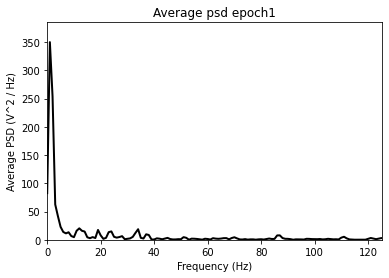

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

epoch1_psd = df_avg_psd.at[0, 'avg_psd']
freqs = calculate_psd(df_c.at[0, 'combined'], True)[1]

plt.plot(epoch1_psd, lw=2, color='k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average PSD (V^2 / Hz)')
plt.ylim([0, epoch1_psd.max() * 1.1])
plt.title("Average psd epoch1")
plt.xlim([0, 250.4/2])

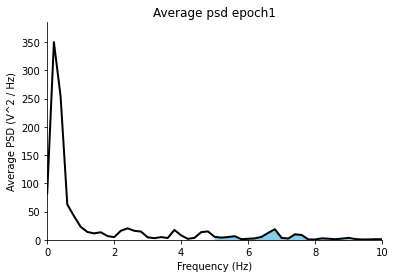

In [25]:
# Define lower and upper limits
low, high = 5, 9

# Find intersecting values in frequency vector
idx_band1 = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the area
plt.plot(freqs, epoch1_psd, lw=2, color='k')
plt.fill_between(freqs, epoch1_psd, where=idx_band1, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average PSD (V^2 / Hz)')
plt.ylim([0, epoch1_psd.max() * 1.1])
plt.title("Average psd epoch1")
plt.xlim([0, 10])
sns.despine()

In [26]:
#Average band power = area under the psd in blue
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0] 

# Compute the absolute power by approximating the area under the curve
band1_power = simps(epoch1_psd[idx_band1], dx=freq_res)
print('Absolute band1 power: %.3f uV^2' % band1_power)

Absolute band1 power: 19.361 uV^2


In [27]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(epoch1_psd, dx=freq_res)
band1_rel_power = band1_power / total_power
print('Relative band1 power: %.3f' % band1_rel_power)

Relative band1 power: 0.074


In [28]:
print(total_power)

261.75763491603465


Epoch1 has total power 261.75763491603465, 5-9Hz band power 19.361 which is 1% relative. 

In [29]:
def band_power(x, low, high):
    epoch_psd = calculate_psd(x, True)[0]
    freqs = calculate_psd(x, True)[1]

    # Find intersecting values in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Compute the absolute power by approximating the area under the curve
    band_power = simps(epoch_psd[idx_band], dx=freq_res)
    
    return band_power

#### TOTAL POWER

In [30]:
import scipy 
import numpy

def total_power(x):
    epoch_psd = calculate_psd(x, True)[0]
    freqs = calculate_psd(x, True)[1]
    freq_res = freqs[1] - freqs[0] # 0.2
    total_power = simps(epoch_psd, dx=freq_res)
    return total_power

In [113]:
b = []
for i, x in df_c.head(50).iterrows():
    data = df_c.at[i,'combined']
    band1 = band_power(data, 5, 9)
    band2 = band_power(data, 1, 20)
    band3 = band_power(data, 60, 90)
    total = total_power(data)
    b.append([band1, band2, band3, total])

In [114]:
df_bp = pd.DataFrame(b, columns = ['5-9Hz','1-20Hz','60-90Hz', 'total_power'])
df_bp

,5-9Hz,1-20Hz,60-90Hz,total_power
0,1.936056e+01,7.871035e+01,2.536445,2.617576e+02
1,2.408560e+01,7.092787e+01,2.953217,6.127622e+02
2,2.994271e+01,1.241788e+02,2.111393,4.409960e+02
3,1.207984e+02,6.901638e+02,1.724798,9.267837e+02
4,1.064703e+02,4.237550e+02,1.507730,7.166690e+02
5,6.389716e+01,4.210268e+02,1.546384,2.284836e+03
6,1.729853e+02,6.624441e+02,1.523984,1.003143e+03
7,6.736102e+01,1.727013e+02,1.245336,4.722166e+02
8,9.861804e+01,4.299849e+02,1.525691,6.339697e+02
9,1.958577e+02,4.994037e+02,1.784474,8.735390e+02


In [115]:
# Can also include realtive power of the bands but that wouldn't add any new features. 

#### CENTRE OF MASS

In [116]:
epoch1_psd = calculate_psd(df_c.at[0, 'combined'], True)[0]
freqs = calculate_psd(df_c.at[0, 'combined'], True)[1]

In [117]:
df_pow = pd.DataFrame(epoch1_psd, columns=['Power'])
df_pow['Frequency'] = freqs
df_pow

,Power,Frequency
0,8.264532e+01,0.0
1,3.501014e+02,0.2
2,2.540406e+02,0.4
3,6.258960e+01,0.6
4,4.201604e+01,0.8
...,...,...
622,2.227259e-14,124.4
623,2.217101e-14,124.6
624,2.209820e-14,124.8
625,2.205532e-14,125.0


In [118]:
from CentreOfMass import CentreofMass

In [119]:
com = CentreofMass(df_pow, 0, 'ch1', 'S7063')

In [120]:
pow_arr, freq_arr = com.frequency_slice()

In [121]:
pow_arr, len(pow_arr)

(array([22.94978326, 13.90339171, 11.37984091, 13.35883314,  6.6774629 ,
         4.67066203, 15.9832542 , 20.29977834, 15.94307976, 14.62574277,
         4.42422284,  2.8634456 ,  4.77944518,  3.12862275, 17.43051054,
         7.84837321,  1.6863652 ,  3.46825277, 13.56427738, 14.84686942,
         5.28166697,  3.84592132,  4.89462236,  6.44246101,  1.07601365,
         1.74088634,  2.47579305,  5.18684943, 12.20688421, 18.74529926,
         3.50256848,  2.2443412 ,  9.72823669,  8.53330642,  0.65083901,
         0.55443001,  2.58840536,  1.98605673,  0.92894895,  2.12846669,
         3.39006754,  1.34072507,  0.62717512,  0.67471086,  1.11466017,
         0.99212456,  4.71253657,  3.50787418,  0.14284115,  2.0214685 ,
         1.8817605 ,  1.51347894,  0.88220514,  0.2664501 ,  1.87878418,
         1.44347533,  0.47401296,  2.85034363,  2.09702623,  1.75201269,
         2.16936613,  2.91485991,  2.96549783,  0.78525416,  3.12847769,
         4.48253187,  2.47862686,  0.70093957,  0.5

In [122]:
freq_arr, len(freq_arr)

(array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
         5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
         7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
         9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8,
        12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
        14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2,
        16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4,
        18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. , 20.2, 20.4, 20.6,
        20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. , 22.2, 22.4, 22.6, 22.8,
        23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2, 24.4, 24.6, 24.8, 25. ,
        25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4, 26.6, 26.8, 27. , 27.2,
        27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6, 28.8, 29. , 29.2, 29.4,
        29.6, 29.8, 30. , 30.2, 30.4, 

In [123]:
com.calculate_cent_mass(pow_arr, freq_arr) # Centre of mass of epoch 1!

10.833157913378082

In [124]:
c = []
for i, x in df_c.head(50).iterrows():
    data = df_c.at[i,'combined']
    
    psd = calculate_psd(data, True)[0]
    freqs = calculate_psd(data, True)[1]
    
    df_pow = pd.DataFrame(psd, columns=['Power'])
    df_pow['Frequency'] = freqs
    
    com = CentreofMass(df_pow, 0, 'ch1', 'S7063')
    pow_arr, freq_arr = com.frequency_slice()
    
    c.append(com.calculate_cent_mass(pow_arr, freq_arr))

df_com = pd.DataFrame(c, columns = ['CentreOfMass'])
df_com

,CentreOfMass
0,10.833158
1,12.313404
2,9.467070
3,6.726666
4,7.543863
5,6.663482
6,8.763685
7,8.566550
8,7.346341
9,9.557495


#### PEAKS

In [125]:
epoch1_psd = calculate_psd(df_c.at[0, 'combined'], True)[0]
freqs = calculate_psd(df_c.at[0, 'combined'], True)[1]

In [126]:
import numpy as np
maxIndex = np.argmax(epoch1_psd)

In [129]:
m = []
for i, x in df_c.head(50).iterrows():
    data = df_c.at[i,'combined']
    
    psd = calculate_psd(data, True)[0]
    freqs = calculate_psd(data, True)[1]
    
    maxIndex = np.argmax(psd)
    
    m.append([psd[maxIndex], freqs[maxIndex]])

df_peak = pd.DataFrame(m, columns = ['peak_psd', 'peak_Hz'])
df_peak

,peak_psd,peak_Hz
0,350.101434,0.2
1,1350.971040,0.2
2,605.506122,0.2
3,495.759145,1.8
4,543.142289,0.4
5,3391.243858,0.4
6,690.056619,0.2
7,672.887780,0.2
8,402.138596,0.2
9,725.652059,0.4


## Feature Selection

In [130]:
pd.concat([df_bp, df_com, df_peak], axis=1)

,5-9Hz,1-20Hz,60-90Hz,total_power,CentreOfMass,peak_psd,peak_Hz
0,1.936056e+01,7.871035e+01,2.536445,2.617576e+02,10.833158,350.101434,0.2
1,2.408560e+01,7.092787e+01,2.953217,6.127622e+02,12.313404,1350.971040,0.2
2,2.994271e+01,1.241788e+02,2.111393,4.409960e+02,9.467070,605.506122,0.2
3,1.207984e+02,6.901638e+02,1.724798,9.267837e+02,6.726666,495.759145,1.8
4,1.064703e+02,4.237550e+02,1.507730,7.166690e+02,7.543863,543.142289,0.4
5,6.389716e+01,4.210268e+02,1.546384,2.284836e+03,6.663482,3391.243858,0.4
6,1.729853e+02,6.624441e+02,1.523984,1.003143e+03,8.763685,690.056619,0.2
7,6.736102e+01,1.727013e+02,1.245336,4.722166e+02,8.566550,672.887780,0.2
8,9.861804e+01,4.299849e+02,1.525691,6.339697e+02,7.346341,402.138596,0.2
9,1.958577e+02,4.994037e+02,1.784474,8.735390e+02,9.557495,725.652059,0.4


In [131]:
# 1. Select channels
# 2. Eliminate packet loss epochs
# 3. Concat time and freq dom features for feature selection